In [323]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import mcbe

from PIL import Image
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from random import randint
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
# set the font globally
plt.rcParams.update({'font.family':'Times New Roman', 'font.size': 22})

In [324]:
num_vert = 12
W = mcbe.random_sphere(num_vert,3)[0]

In [335]:
mcbe.mcbe(W,10000)

array([-0.57525018, -0.57583251, -0.57654637, -0.57539752])

In [329]:
#icosahedron
phi = (1+np.sqrt(5))/2
W = np.array([[0,1,phi],[0,1,-phi],[0,-1,phi],[0,-1,-phi],[1,phi,0],[-1,phi,0],[1,-phi,0],[-1,-phi,0],[phi,0,1],[phi,0,-1],[-phi,0,1],[-phi,0,-1]])/(np.sqrt(1+phi**2))

In [332]:
#tetrahedron
W = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])/np.sqrt(3)

In [245]:
#calculate true facets
hull = ConvexHull(W)
true_facets = hull.simplices
true_facets.shape

(20, 3)

In [246]:
#create color dict
color = []
true_facets_set = set([tuple(np.sort(x)) for x in true_facets])
all_facets = true_facets_set
n = len(all_facets)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
    
color_dict = {}
ind_color = 0

for facet in all_facets:
    color_dict[facet] =  color[ind_color]
    ind_color = ind_color +1

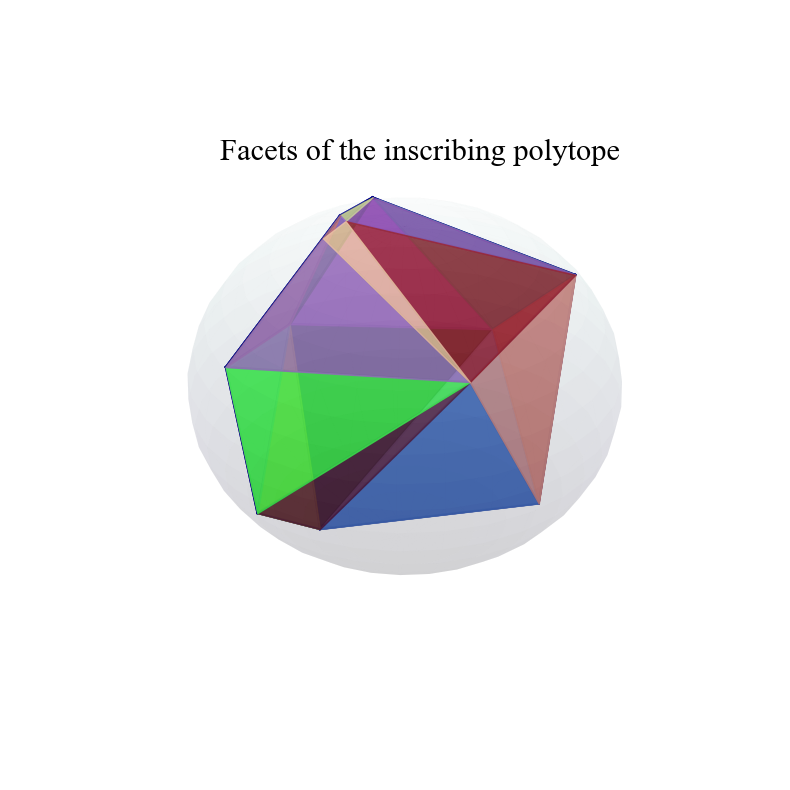

In [247]:
# plot the deformation process
fig = plt.figure(figsize=(10, 10))

r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v) *0.99
y = np.sin(u) * np.sin(v)*0.99
z = np.cos(v)*0.99

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap = plt.cm.bone, alpha=0.1)



for facet in true_facets:
    
    point1, point2, point3 = W[facet[0]], W[facet[1]], W[facet[2]]
    
    vertices = [point1, point2, point3]
    
    ax.add_collection3d(Poly3DCollection([vertices], alpha=0.85,color = color_dict[tuple(np.sort(facet))]))
    
    #add lines
    lines = [[point1,point2],[point2,point3],[point3,point1]]
    
    for line in lines:
        line = np.array(line)
        ax.plot(line[:,0],line[:,1],line[:,2],color="darkblue")
    


#ax.scatter(W[:,0],W[:,1],W[:,2],color="black")




plt.grid(False)
plt.axis('off')
ax.text(0, -1.5, 2.2, "Facets of the inscribing polytope", color='black')
plt.show()

In [248]:
points = []
colors = []
for facet in tqdm(true_facets):
        
        point1, point2, point3 = W[facet[0]], W[facet[1]], W[facet[2]]
        
        for l1 in np.arange(0,1,0.005):
            for l2 in np.arange(0,1-l1,0.005):
                l3 = 1-l1-l2
                
                convex_combination = l1*point1 + l2*point2 + l3*point3
                projection = convex_combination/np.linalg.norm(convex_combination)
                points.append(projection)
                colors.append(color_dict[tuple(np.sort(facet))])

points = np.array(points)
                
        

100%|██████████| 20/20 [00:06<00:00,  3.22it/s]


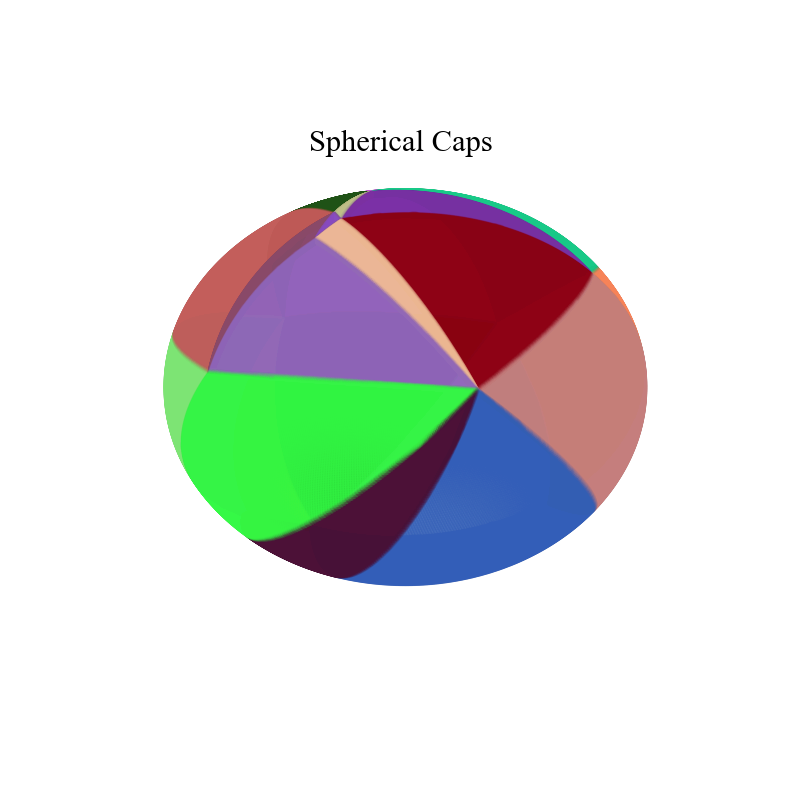

In [249]:
# Create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot( projection='3d')

# Plot the surface with the pattern
ax.scatter(points[:,0],points[:,1],points[:,2],color=colors,alpha=0.2)






ax.text(0, -0.75, 1.9, "Spherical Caps", color='black')


#set xlim and ylim
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

# Remove axes
ax.set_axis_off()

# Show the plot
plt.show()

In [259]:
num_points = 420
# Generate spherical coordinates
theta = np.linspace(0, 2 * np.pi, num_points)
phi = np.linspace(0, np.pi, num_points)

# Create a meshgrid from spherical coordinates
theta, phi = np.meshgrid(theta, phi)

# Parametric equations for a sphere
x =  np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

pattern = pd.DataFrame(np.zeros((num_points,num_points)))


      

In [260]:
for i in tqdm(range(num_points)):
    for j in range(num_points):
        point = np.array([x[i,j],y[i,j],z[i,j]])

        

        corr_x_vert = [np.dot(point, i) for i in W]
        #find subframes
        subframe = tuple(np.sort(np.argsort(corr_x_vert)[-3:]))
        if subframe in color_dict.keys():
            pattern.iloc[i,j] = color_dict[subframe]
            
        else:
            # Generate random hexadecimal color code
            red = random.randint(0, 255)
            green = random.randint(0, 255)
            blue = random.randint(0, 255)

            color_code = f"#{red:02x}{green:02x}{blue:02x}"
            
            color_dict[subframe] = color_code
            pattern.iloc[i,j] = color_code

  0%|          | 0/420 [00:00<?, ?it/s]C:\Users\heckert\AppData\Local\Temp\ipykernel_18208\3355739737.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '#864DC4' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pattern.iloc[i,j] = color_dict[subframe]
100%|██████████| 420/420 [00:16<00:00, 25.55it/s]


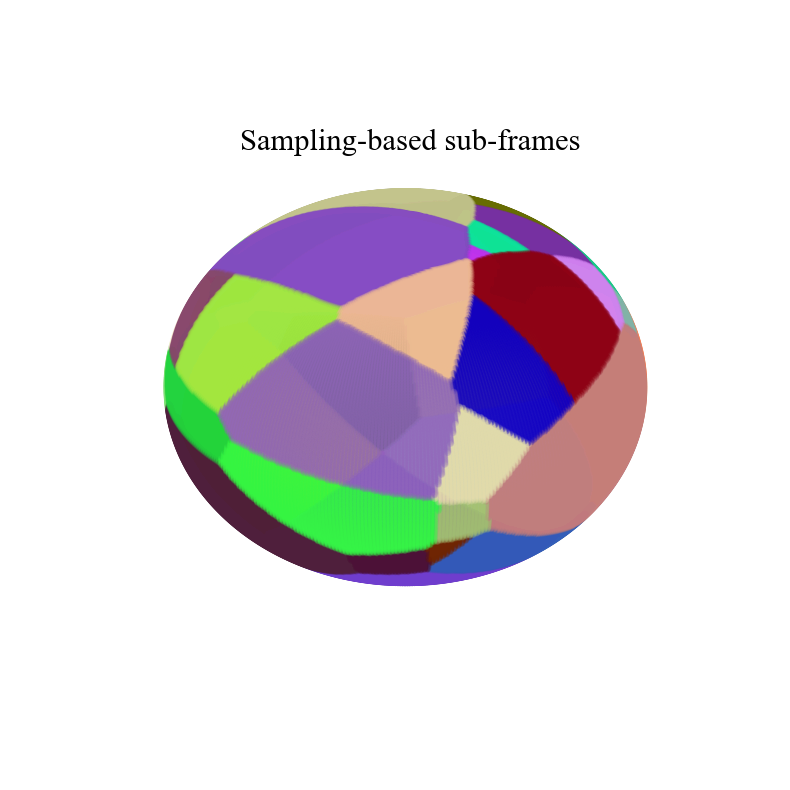

In [261]:
# Create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with the pattern
#surface = ax.plot_surface(x, y, z, facecolors=pattern, rstride=5, cstride=5, alpha=0.75)
ax.scatter(np.array(x).flatten(),np.array(y).flatten(),np.array(z).flatten(),color=list(np.array(pattern).flatten()),alpha=0.2)


ax.text(0, -1.25, 2.2, "Sampling-based sub-frames", color='black')

# Remove axes
ax.set_axis_off()

#set xlim and ylim
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])



# Show the plot
plt.show()

In [163]:
plt.rcParams.update({'font.family':'Times New Roman', 'font.size': 22})

In [137]:
#tetrahedron
W = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])/np.sqrt(3)
alpha, alpha_list =  mcbe.mcbe(W,10000,return_alpha_list=True)

In [322]:
alpha_lists = []
for iter in tqdm(range(100)):
    W = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])/np.sqrt(3)
    alpha, alpha_list =  mcbe.mcbe(W,1000000,return_alpha_list=True)
    alpha_lists.append(alpha_list)

100%|██████████| 100/100 [1:33:55<00:00, 56.36s/it]


In [285]:
alpha_lists = np.array(alpha_lists)
eucl_dis_lists = np.linalg.norm(np.subtract(alpha_lists,-1/(np.sqrt(3))),axis=2)
means = eucl_dis_lists.mean(axis=0)
stds = eucl_dis_lists.std(axis=0)

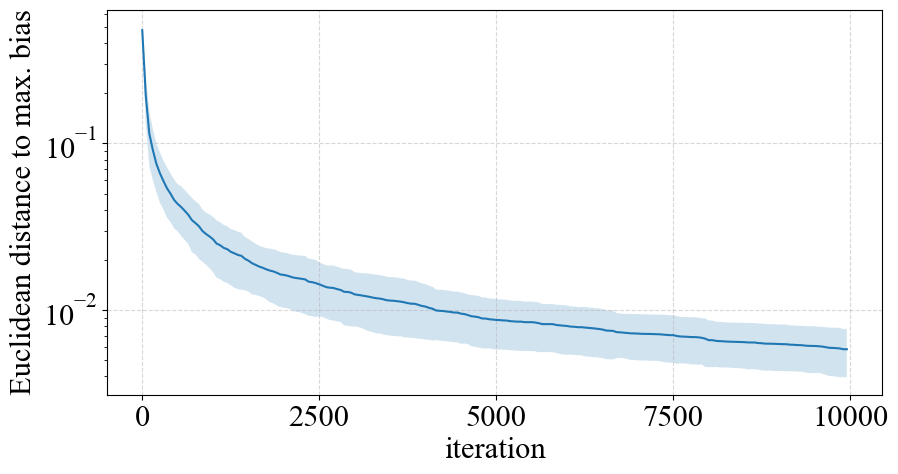

In [287]:
plt.figure(figsize=(10, 5))
plt.plot(means)
plt.fill_between(np.arange(len(means)),means-stds,means+stds,alpha=0.2)
plt.xlabel("iteration")
plt.ylabel("Euclidean distance to max. bias")  
plt.grid(linestyle='--', alpha=0.5)
#change x ticks
#plt.xticks([0,50,100,150,200],["0","2500","5000","7500","10000"])
#semilogy
plt.yscale('log')
plt.show()

100%|██████████| 100/100 [00:34<00:00,  2.88it/s]


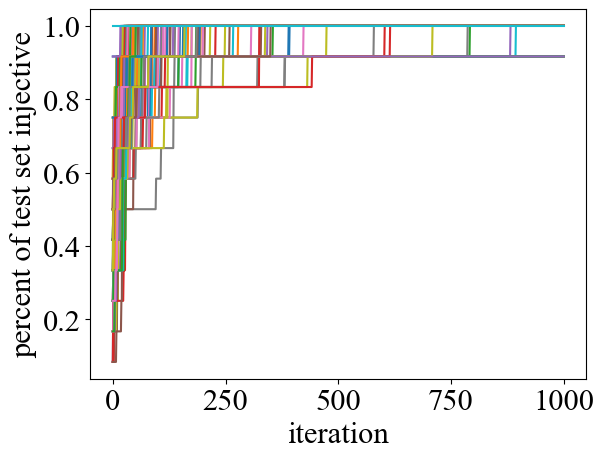

In [156]:
plot_lists = []
for iter in tqdm(range(100)):
    W = mcbe.random_sphere(num_vert,3)[0]
    alpha, plot_data = mcbe.mcbe(W,1000,plot=True,iter_plot=1000, return_plot_data=True)
    plot_lists.append(plot_data)

In [159]:
plot_lists = np.array(plot_lists)
means = plot_lists.mean(axis=0)
stds = plot_lists.std(axis=0)

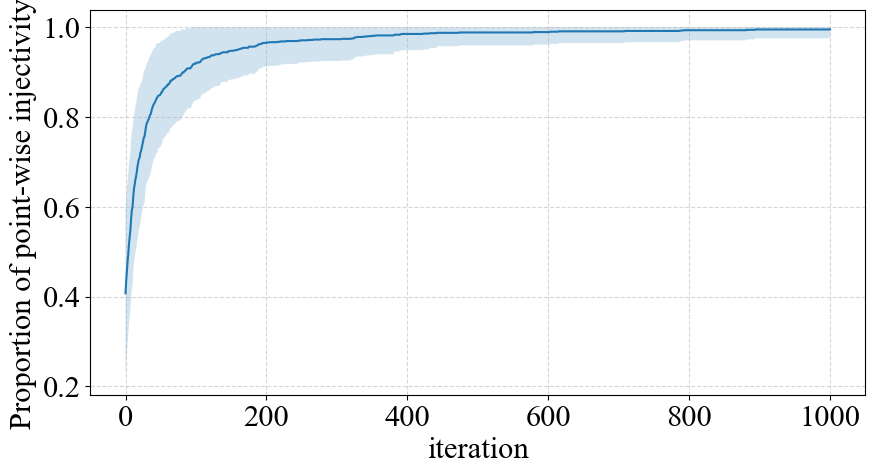

In [267]:
plt.figure(figsize=(10, 5))
plt.plot(means)
plt.fill_between(np.arange(len(means)),means-stds,[np.min([x,1]) for x in means+stds],alpha=0.2)
plt.xlabel("iteration")
plt.ylabel("Proportion of point-wise injectivity   ")  
plt.grid(linestyle='--', alpha=0.5)
plt.show()


100%|██████████| 100/100 [13:07<00:00,  7.87s/it]


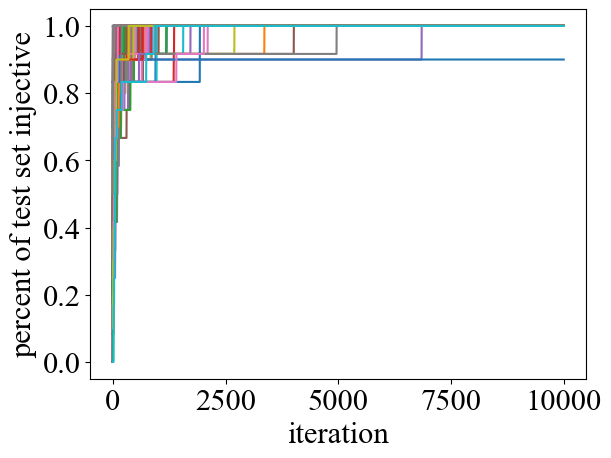

In [288]:
plot_lists6 = []
plot_lists10 = []
plot_lists27 = []
for iter in tqdm(range(100)):
    W6 = mcbe.random_sphere(6,3)[0]
    W10 = mcbe.random_sphere(10,3)[0]
    W27 = mcbe.random_sphere(27,3)[0]
    alpha6, plot_data6 = mcbe.mcbe(W6,10000,plot=True,iter_plot=1000, return_plot_data=True)
    alpha10, plot_data10 = mcbe.mcbe(W10,10000,plot=True,iter_plot=1000, return_plot_data=True)
    alpha27, plot_data27 = mcbe.mcbe(W27,10000,plot=True,iter_plot=1000, return_plot_data=True)
    plot_lists6.append(plot_data6)
    plot_lists10.append(plot_data10)
    plot_lists27.append(plot_data27)

plot_lists6 = np.array(plot_lists6)
plot_lists10 = np.array(plot_lists10)
plot_lists27 = np.array(plot_lists27)
means6 = plot_lists6.mean(axis=0)
means10 = plot_lists10.mean(axis=0)
means27 = plot_lists27.mean(axis=0)
stds6 = plot_lists6.std(axis=0)
stds10 = plot_lists10.std(axis=0)
stds27 = plot_lists27.std(axis=0)

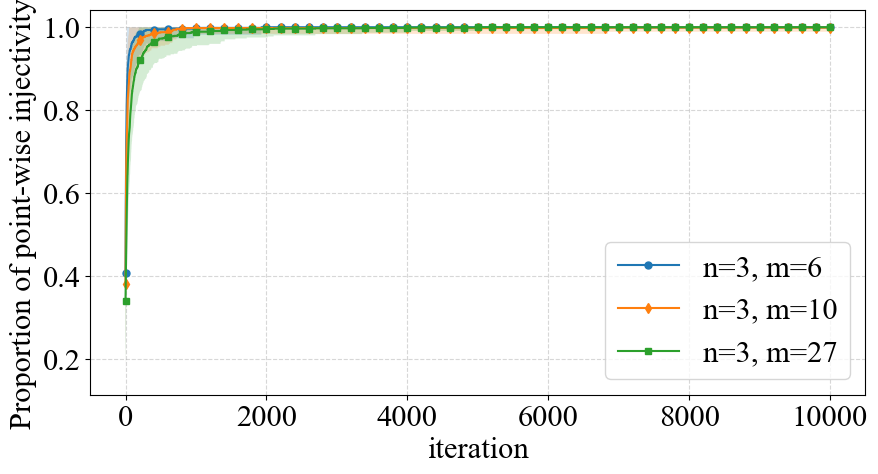

In [299]:
plt.figure(figsize=(10, 5))
plt.plot(means6,label="n=3, m=6",marker="o",markevery=200, markersize=5)
plt.fill_between(np.arange(len(means6)),means6-stds6,[np.min([x,1]) for x in means6+stds6],alpha=0.2)
plt.plot(means10,label="n=3, m=10",marker="d",markevery=200,markersize=5)
plt.fill_between(np.arange(len(means10)),means10-stds10,[np.min([x,1]) for x in means10+stds10],alpha=0.2)
plt.plot(means27,label="n=3, m=27",marker="s",markevery=200,markersize=5)
plt.fill_between(np.arange(len(means27)),means27-stds27,[np.min([x,1]) for x in means27+stds27],alpha=0.2)
plt.xlabel("iteration")
plt.ylabel("Proportion of point-wise injectivity   ")  
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.show()


100%|██████████| 100/100 [25:40<00:00, 15.40s/it]


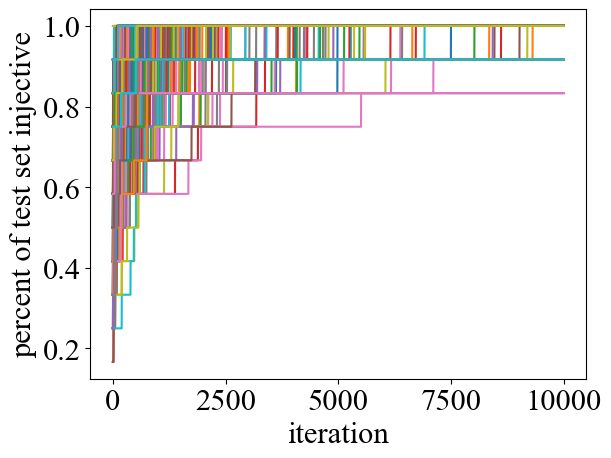

In [277]:
plot_lists60 = []
plot_lists100 = []
plot_lists270 = []
for iter in tqdm(range(100)):
    W60 = mcbe.random_sphere(60,30)[0]
    W100 = mcbe.random_sphere(100,30)[0]
    W270 = mcbe.random_sphere(270,30)[0]
    alpha60, plot_data60 = mcbe.mcbe(W60,10000,plot=True,iter_plot=1000, return_plot_data=True)
    alpha100, plot_data100 = mcbe.mcbe(W100,10000,plot=True,iter_plot=1000, return_plot_data=True)
    alpha270, plot_data270 = mcbe.mcbe(W270,10000,plot=True,iter_plot=1000, return_plot_data=True)
    plot_lists60.append(plot_data60)
    plot_lists100.append(plot_data100)
    plot_lists270.append(plot_data270)

plot_lists60 = np.array(plot_lists60)
plot_lists100 = np.array(plot_lists100)
plot_lists270 = np.array(plot_lists270)
means60 = plot_lists60.mean(axis=0)
means100 = plot_lists100.mean(axis=0)
means270 = plot_lists270.mean(axis=0)
stds60 = plot_lists60.std(axis=0)
stds100 = plot_lists100.std(axis=0)
stds270 = plot_lists270.std(axis=0)

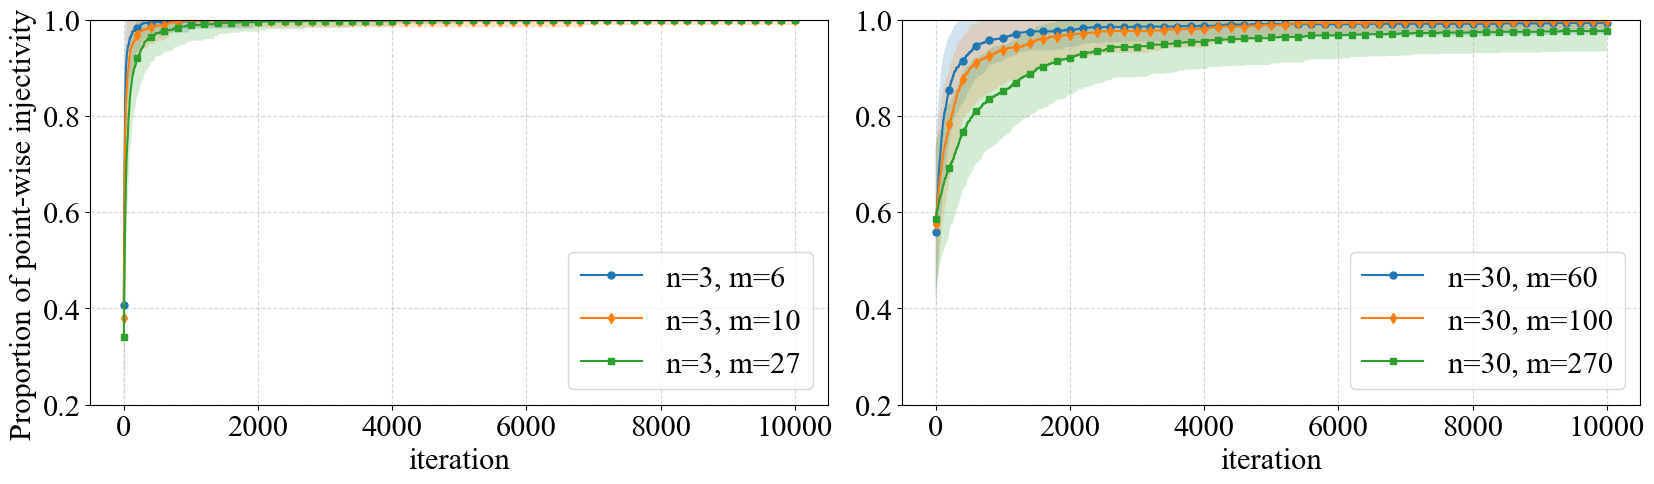

In [321]:
#subplots
plt.figure(figsize=(20, 5))

#move subplots closer together
plt.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 2, )

#plt.figure(figsize=(10, 5))
plt.plot(means60,label="n=30, m=60",marker="o",markevery=200, markersize=5)
plt.fill_between(np.arange(len(means60)),means60-stds60,[np.min([x,1]) for x in means60+stds60],alpha=0.2)
plt.plot(means100,label="n=30, m=100",marker="d",markevery=200,markersize=5)
plt.fill_between(np.arange(len(means100)),means100-stds100,[np.min([x,1]) for x in means100+stds100],alpha=0.2)
plt.plot(means270,label="n=30, m=270",marker="s",markevery=200,markersize=5)
plt.fill_between(np.arange(len(means270)),means270-stds270,[np.min([x,1]) for x in means270+stds270],alpha=0.2)
plt.xlabel("iteration")
#plt.ylabel("Proportion of point-wise injectivity   ")  
plt.grid(linestyle='--', alpha=0.5)
plt.legend(loc="lower right")
plt.ylim([0.2,1])

plt.subplot(1, 2, 1, )

#plt.figure(figsize=(10, 5))
plt.plot(means6,label="n=3, m=6",marker="o",markevery=200, markersize=5)
plt.fill_between(np.arange(len(means6)),means6-stds6,[np.min([x,1]) for x in means6+stds6],alpha=0.2)
plt.plot(means10,label="n=3, m=10",marker="d",markevery=200,markersize=5)
plt.fill_between(np.arange(len(means10)),means10-stds10,[np.min([x,1]) for x in means10+stds10],alpha=0.2)
plt.plot(means27,label="n=3, m=27",marker="s",markevery=200,markersize=5)
plt.fill_between(np.arange(len(means27)),means27-stds27,[np.min([x,1]) for x in means27+stds27],alpha=0.2)
plt.xlabel("iteration")
plt.ylabel("Proportion of point-wise injectivity   ")  
plt.grid(linestyle='--', alpha=0.5)
plt.legend(loc="lower right")
plt.ylim([0.2,1])
plt.show()

